In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.RadixSpline import *
from model.RS_Meta import *

In [2]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/iot_unix.uint64','rb')
data = datafile.read(8)
data_len, = struct.unpack('l', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('l',data_bin)
    data.append(data_unix)

100%|██████████| 15190092/15190092 [00:11<00:00, 1358304.24it/s]


In [3]:
epsilon_list = list(range(25,400,25))
RS_Index_seg_num = []
RS_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    RS_Index = RadixSpline(epsilon)
    RS_Index.learn_index(data)
    RS_Index_seg_num.append(RS_Index.seg_num)
    RS_Index_mae.append(RS_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 35703/15190092 [00:00<00:42, 357026.08it/s]

25 35754 10.952867237407121


  0%|          | 35413/15190092 [00:00<00:42, 354123.58it/s]

50 16316 22.327365364212408


  0%|          | 35038/15190092 [00:00<00:43, 350375.32it/s]

75 11278 33.91137953608181


100%|██████████| 15190092/15190092 [00:44<00:00, 344067.38it/s]


100 8610 44.90809654082411


  0%|          | 35760/15190092 [00:00<00:42, 357592.67it/s]

125 6842 56.10560666782005


  0%|          | 36340/15190092 [00:00<00:41, 363398.61it/s]

150 5714 67.62098952396074


100%|██████████| 15190092/15190092 [00:48<00:00, 315554.23it/s]


175 4843 79.0246537018999


  0%|          | 23470/15190092 [00:00<01:04, 234689.59it/s]

200 4183 90.75336936734814


  0%|          | 35326/15190092 [00:00<00:42, 353256.13it/s]

225 3755 102.70028351375358


  0%|          | 19592/15190092 [00:00<01:17, 195916.92it/s]

250 3434 114.1367823842015


100%|██████████| 15190092/15190092 [00:52<00:00, 291533.76it/s]


275 3166 125.58229127249525


  0%|          | 36692/15190092 [00:00<00:41, 366913.35it/s]

300 2910 136.47189661524104


100%|██████████| 15190092/15190092 [00:48<00:00, 310196.64it/s]


325 2696 148.4168043221858


100%|██████████| 15190092/15190092 [00:49<00:00, 307185.57it/s]


350 2550 159.16138862095107


100%|██████████| 15190092/15190092 [00:53<00:00, 282554.98it/s]

375 2401 170.55842189764223


-49.07614489346743

In [4]:
epsilon_list = list(range(25,400,25))
RS_Meta_Index_seg_num_withBound = []
RS_Meta_Index_mae_withBound = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    RS_Meta_Index = RS_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    RS_Meta_Index.learn_index_lookahead(data)
    RS_Meta_Index_seg_num_withBound.append(RS_Meta_Index.seg_num)
    RS_Meta_Index_mae_withBound.append(RS_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 0/15190092 [00:00<?, ?it/s]

25 20151 13.30440928205043


100%|██████████| 15190092/15190092 [00:51<00:00, 297252.22it/s]


50 10740 28.094801729969774


100%|██████████| 15190092/15190092 [00:51<00:00, 295217.21it/s]


75 7342 42.87624222420773


100%|██████████| 15190092/15190092 [00:52<00:00, 289222.31it/s]


100 5699 56.69909069675154


  0%|          | 0/15190092 [00:00<?, ?it/s]

125 4920 67.47116580992399


100%|██████████| 15190092/15190092 [00:43<00:00, 345973.62it/s]


150 4422 75.44396004974821


100%|██████████| 15190092/15190092 [00:43<00:00, 349740.43it/s]


175 3998 86.39303751419017


100%|██████████| 15190092/15190092 [00:42<00:00, 353965.64it/s]


200 3639 97.77886532879458


100%|██████████| 15190092/15190092 [00:43<00:00, 350198.69it/s]


225 3435 105.23586690587523


100%|██████████| 15190092/15190092 [00:43<00:00, 348871.50it/s]


250 3199 116.49315909344064


100%|██████████| 15190092/15190092 [00:43<00:00, 347097.88it/s]


275 2994 129.70793310534262


100%|██████████| 15190092/15190092 [00:43<00:00, 353210.44it/s]


300 2805 142.40570116362693


100%|██████████| 15190092/15190092 [00:44<00:00, 345033.58it/s]


325 2664 154.34115698575098


100%|██████████| 15190092/15190092 [00:45<00:00, 332932.11it/s]


350 2527 164.39423658526889


100%|██████████| 15190092/15190092 [00:46<00:00, 327389.70it/s]

375 2374 176.1277781596056


-48.151634539912145

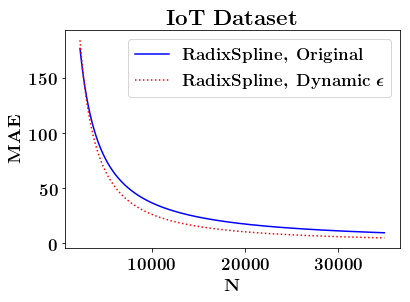

In [7]:
x = np.arange(2300,35000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{IoT~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,RS_Index_seg_num,RS_Index_mae)
p2,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{RadixSpline,~Original}$')
#plt.scatter(RS_Index_seg_num, RS_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{RadixSpline,~Dynamic~\epsilon}$')
#plt.scatter(RS_Meta_Index_seg_num_withBound, RS_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/RadixSpline/IoT_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [6]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(1011848.669186913, 767862.6079649301, 0.2411290034289828)

In [4]:
epsilon_list = list(range(25,400,25))
RS_Meta_Index_seg_num_withBound_list = []
RS_Meta_Index_mae_withBound_list = []
look_list = list(range(200,2000,200))
for lookn in look_list:    
    RS_Meta_Index_seg_num_withBound = []
    RS_Meta_Index_mae_withBound = []
    for i in range(len(epsilon_list)):
        RS_Meta_Index = RS_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
        RS_Meta_Index.learn_index_lookahead(data,lookn=lookn)
        RS_Meta_Index_seg_num_withBound.append(RS_Meta_Index.seg_num)
        RS_Meta_Index_mae_withBound.append(RS_Meta_Index.mae)
    RS_Meta_Index_seg_num_withBound_list.append(RS_Meta_Index_seg_num_withBound)
    RS_Meta_Index_mae_withBound_list.append(RS_Meta_Index_mae_withBound)

100%|██████████| 15190092/15190092 [00:42<00:00, 354734.59it/s]


25 20112 13.573898762430142


100%|██████████| 15190092/15190092 [00:41<00:00, 370286.34it/s]


50 11147 28.304573665518287


  0%|          | 0/15190092 [00:00<?, ?it/s]

75 7327 44.89562578027836


  0%|          | 0/15190092 [00:00<?, ?it/s]

100 5671 59.49616045775101


  0%|          | 0/15190092 [00:00<?, ?it/s]

125 4797 72.54720293991636


  0%|          | 0/15190092 [00:00<?, ?it/s]

150 4243 86.0055155031319


  0%|          | 0/15190092 [00:00<?, ?it/s]

175 3792 100.26509490528431


  0%|          | 0/15190092 [00:00<?, ?it/s]

200 3519 112.19520434767611


  0%|          | 0/15190092 [00:00<?, ?it/s]

225 3347 121.25127076254707


  0%|          | 0/15190092 [00:00<?, ?it/s]

250 3145 134.8907239008164


100%|██████████| 15190092/15190092 [00:39<00:00, 381955.00it/s]


275 2975 146.8327684914614


  0%|          | 0/15190092 [00:00<?, ?it/s]

300 2856 156.38938664755946


  0%|          | 0/15190092 [00:00<?, ?it/s]

325 2703 166.33831388249658


100%|██████████| 15190092/15190092 [00:39<00:00, 385104.66it/s]


350 2507 186.43976297181084


  0%|          | 0/15190092 [00:00<?, ?it/s]

375 2384 195.54614218268065


  0%|          | 0/15190092 [00:00<?, ?it/s]

25 20351 13.058265019066376


100%|██████████| 15190092/15190092 [00:40<00:00, 371465.18it/s]


50 10771 27.921828057394254


100%|██████████| 15190092/15190092 [00:40<00:00, 377399.48it/s]


75 7428 42.963461643286955


  0%|          | 0/15190092 [00:00<?, ?it/s]

100 5698 58.33351851983517


  0%|          | 0/15190092 [00:00<?, ?it/s]

125 4910 68.19212701279228


  0%|          | 0/15190092 [00:00<?, ?it/s]

150 4396 79.83294235479285


  0%|          | 0/15190092 [00:00<?, ?it/s]

175 3931 90.93804685317245


  0%|          | 0/15190092 [00:00<?, ?it/s]

200 3623 100.93385221103335


  0%|          | 0/15190092 [00:00<?, ?it/s]

225 3409 112.0735433333781


  0%|          | 0/15190092 [00:00<?, ?it/s]

250 3171 126.91377952154602


  0%|          | 0/15190092 [00:00<?, ?it/s]

275 3042 136.2006201147432


  0%|          | 0/15190092 [00:00<?, ?it/s]

300 2889 147.47300714176058


  0%|          | 0/15190092 [00:00<?, ?it/s]

325 2758 157.26676158380081


  0%|          | 0/15190092 [00:00<?, ?it/s]

350 2631 167.32870399994945


  0%|          | 0/15190092 [00:00<?, ?it/s]

375 2482 181.3730459302024


100%|██████████| 15190092/15190092 [00:41<00:00, 361995.15it/s]


25 20363 13.235288107537466


100%|██████████| 15190092/15190092 [00:40<00:00, 372644.45it/s]


50 10693 28.099168523798276


  0%|          | 0/15190092 [00:00<?, ?it/s]

75 7424 43.14512762661345


  0%|          | 0/15190092 [00:00<?, ?it/s]

100 5754 56.57217099145943


  0%|          | 0/15190092 [00:00<?, ?it/s]

125 4901 68.672391845948


  0%|          | 0/15190092 [00:00<?, ?it/s]

150 4364 78.71751882740408


  0%|          | 0/15190092 [00:00<?, ?it/s]

175 3914 90.51324784603017


  0%|          | 0/15190092 [00:00<?, ?it/s]

200 3647 97.80890082825042


100%|██████████| 15190092/15190092 [00:39<00:00, 385070.77it/s]


225 3436 107.47217541539577


  0%|          | 0/15190092 [00:00<?, ?it/s]

250 3266 118.58786582727741


  0%|          | 0/15190092 [00:00<?, ?it/s]

275 3052 132.52344021352866


100%|██████████| 15190092/15190092 [00:39<00:00, 385568.65it/s]


300 2961 140.39558061926155


  0%|          | 0/15190092 [00:00<?, ?it/s]

325 2776 152.15106149455843


  0%|          | 0/15190092 [00:00<?, ?it/s]

350 2630 164.6790058941052


  0%|          | 0/15190092 [00:00<?, ?it/s]

375 2439 181.61671160385336


100%|██████████| 15190092/15190092 [00:42<00:00, 355087.82it/s]


25 20514 13.356002912951416


100%|██████████| 15190092/15190092 [00:40<00:00, 371134.38it/s]


50 10710 29.005716621071155


  0%|          | 0/15190092 [00:00<?, ?it/s]

75 7375 42.230491691557894


  0%|          | 0/15190092 [00:00<?, ?it/s]

100 5670 57.532815074457744


  0%|          | 0/15190092 [00:00<?, ?it/s]

125 4908 68.49112065944038


100%|██████████| 15190092/15190092 [00:39<00:00, 382471.03it/s]


150 4458 75.88181335570582


  0%|          | 0/15190092 [00:00<?, ?it/s]

175 3968 88.27116484877116


  0%|          | 0/15190092 [00:00<?, ?it/s]

200 3669 98.37639449451656


100%|██████████| 15190092/15190092 [00:39<00:00, 381739.74it/s]


225 3423 107.565111258049


  0%|          | 0/15190092 [00:00<?, ?it/s]

250 3269 115.91392501111909


  0%|          | 0/15190092 [00:00<?, ?it/s]

275 3034 130.7812840106564


  0%|          | 0/15190092 [00:00<?, ?it/s]

300 2883 142.99078254430586


  0%|          | 0/15190092 [00:00<?, ?it/s]

325 2721 153.8507476452414


100%|██████████| 15190092/15190092 [00:40<00:00, 377976.37it/s]


350 2590 167.30659610224876


  0%|          | 0/15190092 [00:00<?, ?it/s]

375 2444 179.3968999002771


  0%|          | 0/15190092 [00:00<?, ?it/s]

25 20767 13.210619000859245


100%|██████████| 15190092/15190092 [00:40<00:00, 372912.08it/s]


50 10725 27.868786114001153


  0%|          | 0/15190092 [00:00<?, ?it/s]

75 7401 42.17094274346726


  0%|          | 0/15190092 [00:00<?, ?it/s]

100 5704 55.89576784656735


  0%|          | 0/15190092 [00:00<?, ?it/s]

125 4951 67.5921004955072


  0%|          | 0/15190092 [00:00<?, ?it/s]

150 4418 75.68571250259708


  0%|          | 0/15190092 [00:00<?, ?it/s]

175 3994 86.81416011173599


100%|██████████| 15190092/15190092 [00:39<00:00, 382988.48it/s]


200 3663 96.82043663725013


  0%|          | 0/15190092 [00:00<?, ?it/s]

225 3432 106.41306208020333


  0%|          | 0/15190092 [00:00<?, ?it/s]

250 3255 114.99052507384418


  0%|          | 0/15190092 [00:00<?, ?it/s]

275 3059 127.18451777645586


  0%|          | 0/15190092 [00:00<?, ?it/s]

300 2867 139.80589867395142


  0%|          | 0/15190092 [00:00<?, ?it/s]

325 2753 150.5109196836991


100%|██████████| 15190092/15190092 [00:39<00:00, 381048.79it/s]


350 2590 166.03732452706672


100%|██████████| 15190092/15190092 [00:39<00:00, 385896.70it/s]


375 2435 178.78234285875294


100%|██████████| 15190092/15190092 [00:42<00:00, 358481.28it/s]


25 21032 13.179264352052641


100%|██████████| 15190092/15190092 [00:40<00:00, 371165.62it/s]


50 10725 28.030691782511916


  0%|          | 0/15190092 [00:00<?, ?it/s]

75 7400 41.66865684552799


  0%|          | 0/15190092 [00:00<?, ?it/s]

100 5757 55.63040164602032


  0%|          | 0/15190092 [00:00<?, ?it/s]

125 4948 67.26522354176657


  0%|          | 0/15190092 [00:00<?, ?it/s]

150 4411 75.27683828379709


  0%|          | 0/15190092 [00:00<?, ?it/s]

175 3950 87.05401678936506


  0%|          | 0/15190092 [00:00<?, ?it/s]

200 3649 97.28272080248098


  0%|          | 0/15190092 [00:00<?, ?it/s]

225 3436 105.46790618516333


  0%|          | 0/15190092 [00:00<?, ?it/s]

250 3234 116.28678160737934


100%|██████████| 15190092/15190092 [00:39<00:00, 384974.15it/s]


275 3051 126.93739313757942


  0%|          | 0/15190092 [00:00<?, ?it/s]

300 2878 137.77997901526862


  0%|          | 0/15190092 [00:00<?, ?it/s]

325 2731 151.5853318070753


  0%|          | 0/15190092 [00:00<?, ?it/s]

350 2564 166.3041131679782


  0%|          | 0/15190092 [00:00<?, ?it/s]

375 2437 178.41269295801501


100%|██████████| 15190092/15190092 [00:42<00:00, 359561.90it/s]


25 21230 13.159285473715366


100%|██████████| 15190092/15190092 [00:40<00:00, 374445.85it/s]


50 10771 27.662436277541968


  0%|          | 0/15190092 [00:00<?, ?it/s]

75 7501 40.61952198841192


  0%|          | 0/15190092 [00:00<?, ?it/s]

100 5811 55.02530234839921


  0%|          | 0/15190092 [00:00<?, ?it/s]

125 4964 66.39038433736938


  0%|          | 0/15190092 [00:00<?, ?it/s]

150 4425 75.6640327129026


  0%|          | 0/15190092 [00:00<?, ?it/s]

175 3975 87.45968925007169


  0%|          | 0/15190092 [00:00<?, ?it/s]

200 3670 96.61329536384638


  0%|          | 0/15190092 [00:00<?, ?it/s]

225 3404 105.88832444201128


  0%|          | 0/15190092 [00:00<?, ?it/s]

250 3233 115.18949720646853


  0%|          | 0/15190092 [00:00<?, ?it/s]

275 2988 130.05736798697467


  0%|          | 0/15190092 [00:00<?, ?it/s]

300 2849 140.59857787563104


  0%|          | 0/15190092 [00:00<?, ?it/s]

325 2716 152.7384852573638


  0%|          | 0/15190092 [00:00<?, ?it/s]

350 2557 164.55158138607717


  0%|          | 0/15190092 [00:00<?, ?it/s]

375 2434 179.06061220695702


100%|██████████| 15190092/15190092 [00:42<00:00, 359431.52it/s]


25 21475 13.083616412593155


100%|██████████| 15190092/15190092 [00:40<00:00, 375638.35it/s]


50 11050 27.429622546064895


  0%|          | 0/15190092 [00:00<?, ?it/s]

75 7581 40.42101239413165


100%|██████████| 15190092/15190092 [00:39<00:00, 379913.84it/s]


100 5957 53.66764171013579


  0%|          | 0/15190092 [00:00<?, ?it/s]

125 5013 66.06492376741366


  0%|          | 0/15190092 [00:00<?, ?it/s]

150 4464 75.54327761806842


  0%|          | 0/15190092 [00:00<?, ?it/s]

175 4039 85.34918136111355


  0%|          | 0/15190092 [00:00<?, ?it/s]

200 3636 98.05615436693866


  0%|          | 0/15190092 [00:00<?, ?it/s]

225 3423 106.66043299803583


  0%|          | 0/15190092 [00:00<?, ?it/s]

250 3202 116.63438970613213


  0%|          | 0/15190092 [00:00<?, ?it/s]

275 3001 129.043038778172


  0%|          | 0/15190092 [00:00<?, ?it/s]

300 2844 141.11867057816372


  0%|          | 0/15190092 [00:00<?, ?it/s]

325 2718 152.42982596813766


  0%|          | 0/15190092 [00:00<?, ?it/s]

350 2550 164.35308917154683


  0%|          | 0/15190092 [00:00<?, ?it/s]

375 2402 179.403596107252


  0%|          | 0/15190092 [00:00<?, ?it/s]

25 21854 13.015328544422246


100%|██████████| 15190092/15190092 [00:40<00:00, 373918.05it/s]


50 11462 26.97894456465438


  0%|          | 0/15190092 [00:00<?, ?it/s]

75 7757 39.46046376809304


  0%|          | 0/15190092 [00:00<?, ?it/s]

100 5963 54.849236462820635


100%|██████████| 15190092/15190092 [00:39<00:00, 383695.40it/s]


125 5043 65.98888959987866


  0%|          | 0/15190092 [00:00<?, ?it/s]

150 4399 76.87683254321304


  0%|          | 0/15190092 [00:00<?, ?it/s]

175 4050 85.55056927897475


  0%|          | 0/15190092 [00:00<?, ?it/s]

200 3637 96.84662713036893


  0%|          | 0/15190092 [00:00<?, ?it/s]

225 3436 105.65367668609248


  0%|          | 0/15190092 [00:00<?, ?it/s]

250 3211 116.47783028568885


  0%|          | 0/15190092 [00:00<?, ?it/s]

275 3002 128.25672938649745


  0%|          | 0/15190092 [00:00<?, ?it/s]

300 2855 139.73848216324168


  0%|          | 0/15190092 [00:00<?, ?it/s]

325 2707 153.65561887314442


  0%|          | 0/15190092 [00:00<?, ?it/s]

350 2540 163.86642220468448


100%|██████████| 15190092/15190092 [00:39<00:00, 388937.60it/s]

375 2411 175.5385447961737


In [20]:
markers= ["v","^",1, "o",1, "<",1, ">", "1", "2", "3", "4"]
colors = ["b", "r", ,"g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]
x = np.arange(2500,21000)
import matplotlib.pylab as pylab
label_size = 24
ticks_size = 18
title_size = 24
legend_size = 16
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.title('IoT, RadixSpline')
plt.xlabel('N')
plt.ylabel('MAE')
def func(x,a,b):
    return a * x**b
i=0
RS_Meta_Index_seg_num_withBound = RS_Meta_Index_seg_num_withBound_list[i]
RS_Meta_Index_mae_withBound = RS_Meta_Index_mae_withBound_list[i]
p,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
plt.plot(RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound,linestyle=linestyles[i], label='Look'+str(look_list[i]),color=colors[i],marker=markers[i],markersize=13)
for i in range(1,len(RS_Meta_Index_mae_withBound_list),2):
    RS_Meta_Index_seg_num_withBound = RS_Meta_Index_seg_num_withBound_list[i]
    RS_Meta_Index_mae_withBound = RS_Meta_Index_mae_withBound_list[i]
    p,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
    plt.plot(RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound,linestyle=linestyles[i], label='Look'+str(look_list[i]),color=colors[i],marker=markers[i],markersize=13)
plt.legend()
#plt.savefig('./results/Main_exp/Iot_lookn', dpi=300, bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-20-8fb686569b1f>, line 2)